<a href="https://colab.research.google.com/github/ebi19912/AI/blob/main/iPassword_(fin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 38.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/merged_passwords.csv')
df

,Password,Label
0,Ainslie1,1
1,jessica18,1
2,jessie12,1
3,jessie17,1
4,jets1234,1
...,...,...
7533478,zigadenus,0
7533479,zinacef,0
7533480,zoisia,0
7533481,zooerasty,0


In [ ]:
data = df.dropna(subset=['Password'])
data

,Password,Label
0,Ainslie1,1
1,jessica18,1
2,jessie12,1
3,jessie17,1
4,jets1234,1
...,...,...
7533478,zigadenus,0
7533479,zinacef,0
7533480,zoisia,0
7533481,zooerasty,0


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


In [ ]:
encoder = LabelEncoder()
data['password_encoded'] = encoder.fit_transform(data['Password'])


<ipython-input-10-799e826dee61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['password_encoded'] = encoder.fit_transform(data['Password'])


In [ ]:
smote = SMOTE()
X = data[['password_encoded']]
y = data['Label']
X_resampled, y_resampled = smote.fit_resample(X, y)


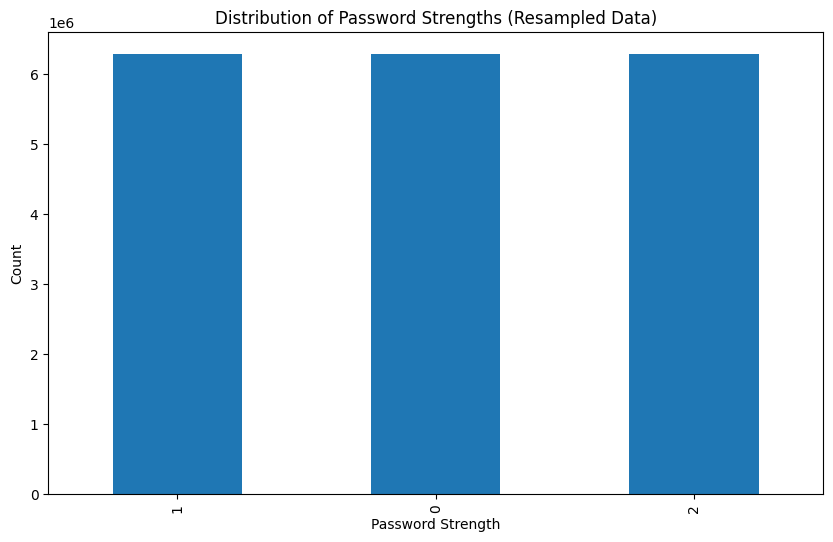

In [ ]:
data_resampled = pd.DataFrame(X_resampled, columns=['password_encoded'])
data_resampled['strength'] = y_resampled
data_resampled['password'] = encoder.inverse_transform(data_resampled['password_encoded'])

strength_counts_resampled = data_resampled['strength'].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
strength_counts_resampled.plot(kind='bar')
plt.xlabel('Password Strength')
plt.ylabel('Count')
plt.title('Distribution of Password Strengths (Resampled Data)')
plt.show()

In [ ]:
data

,Password,Label,password_encoded
0,Ainslie1,1,874921
1,jessica18,1,3659279
2,jessie12,1,3659873
3,jessie17,1,3659882
4,jets1234,1,3664307
...,...,...,...
7533478,zigadenus,0,7467096
7533479,zinacef,0,7470882
7533480,zoisia,0,7487765
7533481,zooerasty,0,7491580


In [ ]:
data_resampled

,password_encoded,strength,password
0,874921,1,Ainslie1
1,3659279,1,jessica18
2,3659873,1,jessie12
3,3659882,1,jessie17
4,3664307,1,jets1234
...,...,...,...
18879397,962197,2,Harwood Heights
18879398,1175046,2,ZzIy3eW3eV
18879399,1170622,2,ZgNcDD
18879400,998624,2,LY05790579


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder# Add new features
data['length'] = data['password'].str.len()
data['uppercase'] = data['password'].str.contains(r'[A-Z]').astype(int)
data['lowercase'] = data['password'].str.contains(r'[a-z]').astype(int)
data['digits'] = data['password'].str.contains(r'\d').astype(int)
data['special'] = data['password'].str.contains(r'[!@#$%^&*(),.?":{}|<>]').astype(int)
data['is_palindrome'] = data['password'].apply(lambda x: str(x) == str(x)[::-1])
data['is_sequential'] = data['password'].apply(lambda x: ''.join(sorted(str(x))) == str(x))
data['has_repeat'] = data['password'].apply(lambda x: len(x) != len(set(x)))
data['num_unique_chars'] = data['password'].apply(lambda x: len(set(str(x))))

encoder = LabelEncoder()
data['password_encoded'] = encoder.fit_transform(data['password'])

smote = SMOTE()
X = data[['password_encoded', 'length', 'uppercase', 'lowercase', 'digits', 'special', 'is_palindrome', 'is_sequential', 'has_repeat', 'num_unique_chars']]
y = data['strength']
X_resampled, y_resampled = smote.fit_resample(X, y)

data_resampled = pd.DataFrame(X_resampled, columns=['password_encoded', 'length', 'uppercase', 'lowercase', 'digits', 'special', 'is_palindrome', 'is_sequential', 'has_repeat', 'num_unique_chars'])
data_resampled['strength'] = y_resampled
data_resampled['password'] = encoder.inverse_transform(data_resampled['password_encoded'])

print('Number of features:', data_resampled.shape[1])

In [ ]:
# Print the first few rows
print(data.head())

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

feature_counts = pd.DataFrame(data.count()).transpose()

feature_counts = feature_counts.rename(index={0:'Feature'})

feature_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Occurrences per Feature')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['password_encoded'] = encoder.fit_transform(data['password'])

X = data[['password_encoded', 'length', 'uppercase', 'lowercase', 'digits', 'special', 'is_palindrome', 'is_sequential', 'has_repeat', 'num_unique_chars']]
y = data['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Gradient Boosting - Accuracy: {accuracy}")
print(f"Gradient Boosting - Precision: {precision}")
print(f"Gradient Boosting - Recall: {recall}")
print(f"Gradient Boosting - F1-score: {f1}")


In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier with the best parameters
rf_model = RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Random Forest Accuracy: {accuracy}")
print(f"Random Forest Precision: {precision}")
print(f"Random Forest Recall: {recall}")
print(f"Random Forest F1-score: {f1}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

print("\nDecision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)

ConfusionMatrixDisplay.from_predictions(y_test, dt_pred)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

end_time = time.time()

execution_time = end_time - start_time
print(f"\nExecution Time: {execution_time:.4f} seconds")


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

start_time = time.time()

lr = LogisticRegression(penalty='l2',  # نوع پنالتی (l1, l2, elasticnet, none)
    C=2.0,  # معکوس قدرت تنظیم (مقدار کمتر = تنظیم بیشتر)
    solver='newton-cg',  # الگوریتم حل کننده (newton-cg, lbfgs, liblinear, sag, saga)
    max_iter=1000,  # حداکثر تعداد تکرار
    class_weight='balanced',  # وزن کلاس ها (balanced, None, یا دیکشنری وزن ها)
)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')

print("\nLogistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)

ConfusionMatrixDisplay.from_predictions(y_test, lr_pred)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

end_time = time.time()
execution_time = end_time - start_time

print(f"\nExecution Time: {execution_time:.4f} seconds")


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

start_time = time.time()

#xgb_model = xgb.XGBClassifier()
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=150,
    gamma=0.2,
    alpha=0
)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

print("\nXGBoost:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1-score:", xgb_f1)

ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred)
plt.title("Confusion Matrix - XGBoost")
plt.show()

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

start_time = time.time()

# Create AdaBoostClassifier with the best parameters
ada = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=3)  # Set max_depth for the base estimator
)

ada.fit(X_train, y_train)

ada_pred = ada.predict(X_test)

ada_accuracy = accuracy_score(y_test, ada_pred)
ada_precision = precision_score(y_test, ada_pred, average='weighted')
ada_recall = recall_score(y_test, ada_pred, average='weighted')
ada_f1 = f1_score(y_test, ada_pred, average='weighted')

print("\nAdaBoost:")
print("Accuracy:", ada_accuracy)
print("Precision:", ada_precision)
print("Recall:", ada_recall)
print("F1-score:", ada_f1)

ConfusionMatrixDisplay.from_predictions(y_test, ada_pred)
plt.title("Confusion Matrix - AdaBoost")
plt.show()

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

start_time = time.time()

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)
plt.title("Confusion Matrix - Random Forest")
plt.show()

end_time = time.time()


execution_time = end_time - start_time
print(f"\nExecution Time: {execution_time:.4f} seconds")


In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


start_time = time.time()


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)


knn_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')


print("\nK-Nearest Neighbors:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)


ConfusionMatrixDisplay.from_predictions(y_test, knn_pred)
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()

end_time = time.time()

execution_time = end_time - start_time
print(f"\nExecution Time: {execution_time:.4f} seconds")


In [ ]:
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import time

# شروع زمان‌سنجی
start_time = time.time()

# بارگذاری مجموعه داده (مثال: دیتاست iris)
data = load_iris()
X, y = data.data, data.target  # ویژگی‌ها و برچسب‌ها

# تقسیم داده‌ها به مجموعه‌های آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مدل‌های پایه
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_leaf=2, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('xgb', XGBClassifier(objective='multi:softmax', num_class=3, learning_rate=0.1, max_depth=5, n_estimators=150, gamma=0.2, subsample=0.8)),
    ('ada', AdaBoostClassifier(n_estimators=50, learning_rate=0.1, estimator=DecisionTreeClassifier(max_depth=3))),
    ('knn', KNeighborsClassifier(n_neighbors=2)),
    ('dt', DecisionTreeClassifier())
]

# مدل نهایی برای تصمیم‌گیری
meta_model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='newton-cg')

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_clf.fit(X_train, y_train)

# پیش‌بینی روی داده‌های تست
stacking_pred = stacking_clf.predict(X_test)

# ارزیابی عملکرد
stacking_accuracy = accuracy_score(y_test, stacking_pred)
stacking_precision = precision_score(y_test, stacking_pred, average='weighted')
stacking_recall = recall_score(y_test, stacking_pred, average='weighted')
stacking_f1 = f1_score(y_test, stacking_pred, average='weighted')

print("\nStacking Classifier:")
print("Accuracy:", stacking_accuracy)
print("Precision:", stacking_precision)
print("Recall:", stacking_recall)
print("F1-score:", stacking_f1)

# نمایش ماتریس درهم‌ریختگی
ConfusionMatrixDisplay.from_predictions(y_test, stacking_pred)
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()

# پایان زمان‌سنجی
end_time = time.time()
execution_time = end_time - start_time
print(f"\nExecution Time: {execution_time:.4f} seconds")
